## Лабораторная работа №1 (Безусловная оптимизация)
Выполнил: Куликов А. В.
#### Вариант № 3
Функция: $ f(x) = x_{1}^{2} + x_{2}^{2} + x_{3}^{2} - x_{1}x_{2} + x_{1} - 2 x_{3}$

Задание:
Численно найти минимум функции $f(x)$ используя метод оптимизации LBFGS и метод Ньютона с сопряженными градиентами

Импортируем необходимые для проведения вычислений модули

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

Задаем функцию, которую необходимо минимизировать

In [2]:
def f(x):
    x1, x2, x3 = x
    return x1*x1 + x2*x2 + x3*x3 - x1*x2 + x1 - 2*x3

Задаем начальную точку

In [3]:
x0 = np.array([10, 20, 30])

Определяем функцию для отрисовки траектории процесса минимизации

In [4]:
def plot_trajectory(trajectory, title):
    x_min = trajectory[-1]
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(projection='3d')
    ax.plot(*list(zip(*trajectory)), 'b-', marker='.')
    fig.suptitle(title, fontsize=20)
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.set_zlabel('z', fontsize=16)

    end_point_plot = ax.plot(*x_min, 'r*', zorder=2)
    end_point_plot[0].set_markersize(15)
    annotation_eps = 0.01
    for i, x in enumerate(trajectory):
        if np.linalg.norm(x_min - x) > annotation_eps:
            ax.text(*x, str(i), size=12, zorder=3, color='k') 


Производим минимизацию с использованием метода L-BFGS-B

In [5]:
trajectory = [x0]
minimization_result = minimize(f, x0, method='L-BFGS-B', callback=lambda x: trajectory.append(x))
x_min = minimization_result.x

print(f'Произведено итераций: {len(trajectory)-1}')
print(f'Точка минимума: {x_min}')
print(f'Траектория минимизации:')
for i, tp in enumerate(trajectory):
    if i == 0:
        print(f'\tНачальная точка: {tp}')
    else:
        print(f'\tИтерация {i}: точка {tp}')

Произведено итераций: 6
Точка минимума: [-0.66666578 -0.33333193  1.00000024]
Траектория минимизации:
	Начальная точка: [10 20 30]
	Итерация 1: точка [ 9.92343756 17.70315468 25.5594325 ]
	Итерация 2: точка [ 2.25400639  3.9872351  -0.49260678]
	Итерация 3: точка [1.34444173 0.66389551 0.55912293]
	Итерация 4: точка [-0.58976326 -0.33425708  0.94248578]
	Итерация 5: точка [-0.66674755 -0.33334284  0.9996964 ]
	Итерация 6: точка [-0.66666578 -0.33333193  1.00000024]


Отрисовываем траекторию минимизации методом L-BFGS-B

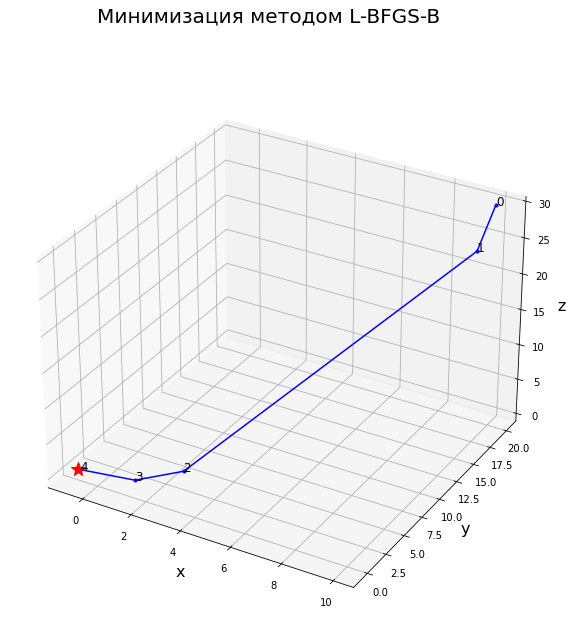

In [6]:
plot_trajectory(trajectory, 'Минимизация методом L-BFGS-B')

Определяем функцию, вычисляющую градиент минимизируемой функции

In [7]:
def grad(x):
    x1, x2, x3 = x
    return np.array([
        2 * x1 - x2 + 1,
        2 * x2 - x1,
        2 * x3 - 2
    ])

Определеяем функцию, для вычисления произведения гессиана минимизируемой функции и произвольного вектора

In [8]:
def hessp(x, p):
    p1, p2, p3 = p
    return np.array([
        2 * p1 - p2,
        -p1 + 2 * p2,
        2 * p3
    ])

Производим минимизацию методом сопряженных градиентов

In [9]:
trajectory = [x0]
minimization_result = minimize(f, x0, method='Newton-CG', jac=grad, hessp=hessp,\
                               callback=lambda x: trajectory.append(x))
x_min = minimization_result.x

print(f'Произведено итераций: {len(trajectory)-1}')
print(f'Точка минимума: {x_min}')
print(f'Траектория минимизации:')
for i, tp in enumerate(trajectory):
    if i == 0:
        print(f'\tНачальная точка: {tp}')
    else:
        print(f'\tИтерация {i}: точка {tp}')

Произведено итераций: 5
Точка минимума: [-0.66666667 -0.33333333  1.        ]
Траектория минимизации:
	Начальная точка: [10 20 30]
	Итерация 1: точка [9.49645809 4.89374262 0.79456907]
	Итерация 2: точка [1.79866596 4.74537248 1.0040328 ]
	Итерация 3: точка [1.87128907 0.97192911 1.00007612]
	Итерация 4: точка [-0.66666667 -0.33333333  0.99997463]
	Итерация 5: точка [-0.66666667 -0.33333333  1.        ]


Отрисовываем траекторию минимизации методом сопряженных градиентов

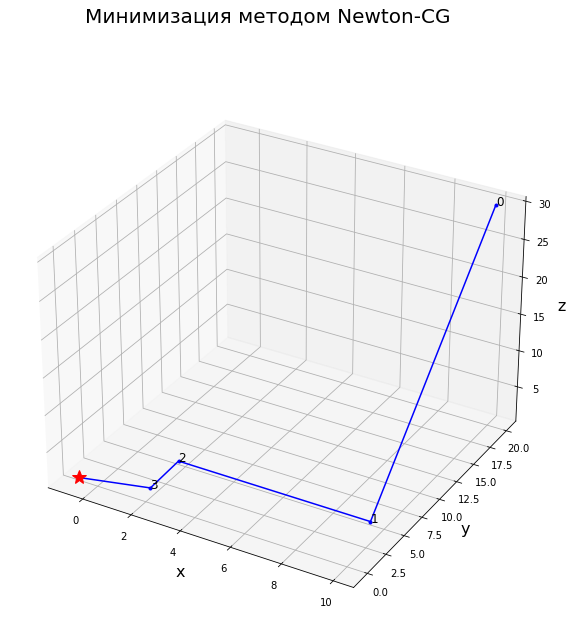

In [10]:
plot_trajectory(trajectory, 'Минимизация методом Newton-CG')